# Protoptye of the Simulation with all steps displayed

Day: 0 Stock Price: 3028.264182043828 Pecentage Change: 0.7741824307430223
Day: 1 Stock Price: 2946.595163512278 Pecentage Change: -2.696892134306142
Day: 2 Stock Price: 2929.6275991905263 Pecentage Change: -0.5758362917261686
Day: 3 Stock Price: 2915.902541757709 Pecentage Change: -0.46849153921848397
Day: 4 Stock Price: 2951.802415604216 Pecentage Change: 1.2311753679142656
Day: 5 Stock Price: 2909.661413743241 Pecentage Change: -1.4276362685457298
Day: 6 Stock Price: 2865.647332191137 Pecentage Change: -1.5126873987540828
Day: 7 Stock Price: 2901.311728739387 Pecentage Change: 1.2445493954407816
Day: 8 Stock Price: 2904.7188478645962 Pecentage Change: 0.11743374872335757
Day: 9 Stock Price: 2903.7181910846057 Pecentage Change: -0.03444935060500552
Day: 10 Stock Price: 2952.8006761001243 Pecentage Change: 1.690332249397291
Day: 11 Stock Price: 3051.363931150852 Pecentage Change: 3.337958293239892
Day: 12 Stock Price: 3059.491987895841 Pecentage Change: 0.26637454359380236
Day: 13 Sto

/data0/sw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in double_scalars
/data0/sw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in double_scalars


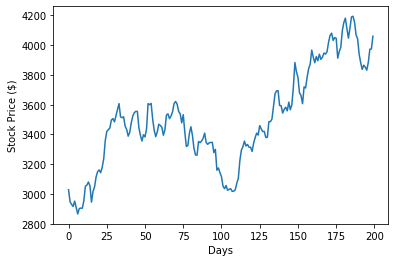

In [8]:
import random
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile


initial_stocks=0 #initial number of stocks in the portfolio
stock_price=3005   #initial stock price
portfolio=0      #set portfolio to zero initially
cost=0           #set cost to zero
total_days=200   #total days to simulate
price_history=np.zeros(total_days)     #array to store price history for each day
days=np.arange(0,total_days,1)         #array to store the days
precentage_change=np.zeros(total_days) #array to store the percentage change in each day
portfolio=np.zeros(total_days)         # array to store the number of stocks in the portfolio in each day
add_portfolio=0                        #counter to count the number of stocks added in the portfolio

for i in range(total_days):
    dp=np.random.normal(-0.061680414262200556,1.4477756014445895,1)[0]
    '''pick a random number for percentage change with normal distribution 
    for given mean and standard deviation
    '''
    precentage_change[i]=dp     
    #store the percentage change of each day in the array 
    stock_price=stock_price+(stock_price*dp*0.01)  
    #calculate and change the stock price based on percentage change
    price_history[i]=stock_price  
    #store the stock price in price history
    print(f"Day: {i} Stock Price: {stock_price} Pecentage Change: {dp}")
    if dp<-5:    
        #buy 3 stocks everytime when the closing price is less than 5% of the last day
        print("\n########### RED DAY !!! BUY !!!")
        buy=3    
        #no of stocks to buy
        cost+=buy*stock_price  
        #cost paid to buy the stocks at the stock_price
        print(f"Bought {buy} stocks for the cost {cost}\n\n")
        add_portfolio+=3
    portfolio[i]=add_portfolio
    
stocks_owned=np.max(portfolio)
print("\n\nTotal stocks bought",stocks_owned)
print("Total cost",cost)
cost_basis=cost/stocks_owned
print(f"Cost per stock ={cost_basis}")
print("Current stock price:",stock_price)
profit=(stocks_owned*stock_price)-cost
print("Profit Made:",profit)
profit_p=profit/cost*100
print("Profit Percentage:",profit_p)

plt.plot(days,price_history)
plt.xlabel("Days")
plt.ylabel("Stock Price ($)")
df = pd.DataFrame({'Day':days,'Closing_Price':price_history,'Percentage_Change':precentage_change,"Portfolio":portfolio})

writer = ExcelWriter('simulated_stock_data_sample.xlsx')
df.to_excel(writer,'Sheet1',index=False)
writer.save()